In [68]:
import os
import time
from rich.pretty import pprint
from typing import List, Dict, Any, Tuple
from pycomex.functional.experiment import Experiment


PATH: str = os.getcwd()
RESULTS_PATH: str = os.path.join(PATH, 'results')

IDENTIFIER = 'ex_01_b'

In [69]:
# ~ loading the experiments

time_start = time.time()
experiments: List[Experiment] = []
for root, folders, files in os.walk(RESULTS_PATH):
    
    for folder in folders:
        folder_path = os.path.join(root, folder)
        
        experiment_path = os.path.join(folder_path, 'experiment_code.py')
        if not os.path.exists(experiment_path):
            continue
        try:
            experiment = Experiment.load(experiment_path)
        except:
            continue
        
        if 'IDENTIFIER' not in experiment.parameters or experiment.parameters['IDENTIFIER'] != IDENTIFIER:
            continue
        
        experiments.append(experiment)
        
time_end = time.time()
duration = time_end - time_start
print(f'loaded {len(experiments)} in {duration:.2f} seconds')

example_experiment = experiments[0]
print('example experiment:')
pprint(example_experiment.data, max_length=5)

if 'r2' in example_experiment.data:
    performance_key = 'r2'
    performance_name = r'$R^2 \uparrow$'
elif 'accuracy' in example_experiment.data:
    performance_key = 'accuracy'
    performance_name = r'$\text{Accuracy} \uparrow$'
    
print(f'performance key: {performance_key}')

loaded 18 in 2.55 seconds
example experiment:


{
│   'dataset_path': '/media/ssd/.visual_graph_datasets/datasets/mutag',
│   'node_dim': 45,
│   'edge_dim': 11,
│   'output_dim': 2,
│   'indices': {
│   │   'train': [0, 1, 2, 3, 4, ... +5266],
│   │   'val': [2154, 5399, 4963, 1192, 3360, ... +580],
│   │   'test': [1949, 4854, 4458, 1068, 3030, ... +645],
│   │   'example': [5657, 4956, 3083, 4804, 1503, ... +45],
│   │   'train_filtered': [0, 1, 2, 3, 4, ... +5266]
│   },
│   ... +13
}

performance key: accuracy


In [70]:
from collections import defaultdict

# ~ constructing experiment map

# The keys will be a combination of (learning_rate, lr_scheduler) experiment parameters
# the values will be a list of experiments with the same parameters but different keys.
key_experiments_map: Dict[Tuple[str, str], List[Experiment]] = defaultdict(list)
experiments_all = experiments

for experiment in experiments:
    
    learning_rate = experiment.parameters['LEARNING_RATE']
    lr_schedule = experiment.parameters['LR_SCHEDULER']
    
    key = (learning_rate, lr_schedule)
    key_experiments_map[key].append(experiment)
    
pprint(key_experiments_map, max_length=5)

defaultdict(<class 'list'>, {
│   (0.0001, 'cyclic'): [
│   │   <pycomex.functional.experiment.Experiment object at 0x72c176e8aad0>,
│   │   <pycomex.functional.experiment.Experiment object at 0x72c16d2fda80>,
│   │   <pycomex.functional.experiment.Experiment object at 0x72c174e0d720>
│   ],
│   (1e-06, 'cyclic'): [
│   │   <pycomex.functional.experiment.Experiment object at 0x72c176dce7a0>,
│   │   <pycomex.functional.experiment.Experiment object at 0x72c1766c2dd0>,
│   │   <pycomex.functional.experiment.Experiment object at 0x72c16b1a2dd0>
│   ],
│   (1e-06, None): [
│   │   <pycomex.functional.experiment.Experiment object at 0x72c176266d70>,
│   │   <pycomex.functional.experiment.Experiment object at 0x72c176266b90>,
│   │   <pycomex.functional.experiment.Experiment object at 0x72c169764c40>
│   ],
│   (1e-05, None): [
│   │   <pycomex.functional.experiment.Experiment object at 0x72c16d2fc400>,
│   │   <pycomex.functional.experiment.Experiment object at 0x72c1758e4640>,
│   │   <pycomex.functional.experiment.Experiment object at 0x72c169085660>
│   ],
│   (0.0001, None): [
│   │   <pycomex.functional.experiment.Experiment object at 0x72c168c9d0f0>,
│   │   <pycomex.functional.experiment.Experiment object at 0x72c179c42c80>,
│   │   <pycomex.functional.experiment.Experiment object at 0x72c176545f90>
│   ],
│   ... +1
})

In [71]:
example_experiment = experiments[0]
pprint(example_experiment.data, max_length=20)

{
│   'dataset_path': '/media/ssd/.visual_graph_datasets/datasets/mutag',
│   'node_dim': 45,
│   'edge_dim': 11,
│   'output_dim': 2,
│   'indices': {
│   │   'train': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 21, ... +5251],
│   │   'val': [
│   │   │   2154,
│   │   │   5399,
│   │   │   4963,
│   │   │   1192,
│   │   │   3360,
│   │   │   5498,
│   │   │   4304,
│   │   │   5700,
│   │   │   5295,
│   │   │   601,
│   │   │   5515,
│   │   │   116,
│   │   │   4261,
│   │   │   2354,
│   │   │   5020,
│   │   │   2122,
│   │   │   1734,
│   │   │   4271,
│   │   │   4931,
│   │   │   5009,
│   │   │   ... +565
│   │   ],
│   │   'test': [
│   │   │   1949,
│   │   │   4854,
│   │   │   4458,
│   │   │   1068,
│   │   │   3030,
│   │   │   4947,
│   │   │   3883,
│   │   │   5125,
│   │   │   4758,
│   │   │   536,
│   │   │   4961,
│   │   │   107,
│   │   │   3843,
│   │   │   2124,
│   │   │   4512,
│   │   │   1919,
│   │   │   1570,
│   │   │   5874,
│   │   │   3852,
│   │   │   4431,
│   │   │   ... +630
│   │   ],
│   │   'example': [
│   │   │   5657,
│   │   │   4956,
│   │   │   3083,
│   │   │   4804,
│   │   │   1503,
│   │   │   519,
│   │   │   5299,
│   │   │   2587,
│   │   │   1933,
│   │   │   4822,
│   │   │   2837,
│   │   │   2407,
│   │   │   5149,
│   │   │   4907,
│   │   │   4223,
│   │   │   4237,
│   │   │   5034,
│   │   │   2047,
│   │   │   1927,
│   │   │   2646,
│   │   │   ... +30
│   │   ],
│   │   'train_filtered': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 21, ... +5251]
│   },
│   'contrastive_factor': [
│   │   0.0,
│   │   0.0,
│   │   0.0,
│   │   0.0,
│   │   0.0,
│   │   0.0,
│   │   0.0,
│   │   0.0,
│   │   0.0,
│   │   0.0,
│   │   0.0,
│   │   0.0,
│   │   0.0,
│   │   0.0,
│   │   0.0,
│   │   0.0,
│   │   0.0,
│   │   0.0,
│   │   0.0,
│   │   0.0,
│   │   ... +130
│   ],
│   'loss_pred': [
│   │   0.6307971477508545,
│   │   0.5773470997810364,
│   │   0.5615110397338867,
│   │   0.5618714690208435,
│   │   0.5549117922782898,
│   │   0.5378602147102356,
│   │   0.5382910966873169,
│   │   0.5409315228462219,
│   │   0.525330662727356,
│   │   0.5193356275558472,
│   │   0.509959876537323,
│   │   0.5051422119140625,
│   │   0.4816145896911621,
│   │   0.4784198999404907,
│   │   0.46254459023475647,
│   │   0.4561184346675873,
│   │   0.4467892050743103,
│   │   0.4417647123336792,
│   │   0.4235450327396393,
│   │   0.40767374634742737,
│   │   ... +130
│   ],
│   'loss_expl': [
│   │   1.5782694816589355,
│   │   0.8430759906768799,
│   │   0.6815910339355469,
│   │   0.6400129795074463,
│   │   0.6215826869010925,
│   │   0.6034442782402039,
│   │   0.5984331965446472,
│   │   0.5944659113883972,
│   │   0.5787107944488525,
│   │   0.5783128142356873,
│   │   0.5666863918304443,
│   │   0.5609292984008789,
│   │   0.5423481464385986,
│   │   0.5397665500640869,
│   │   0.5281142592430115,
│   │   0.5221977829933167,
│   │   0.5170114040374756,
│   │   0.5130822658538818,
│   │   0.5029043555259705,
│   │   0.4930466413497925,
│   │   ... +130
│   ],
│   'loss_spar': [
│   │   0.6138828992843628,
│   │   0.4117811620235443,
│   │   0.3302805423736572,
│   │   0.2898482084274292,
│   │   0.2677935063838959,
│   │   0.2565857470035553,
│   │   0.2535053789615631,
│   │   0.2483006715774536,
│   │   0.24172697961330414,
│   │   0.2442801147699356,
│   │   0.23756994307041168,
│   │   0.2382606863975525,
│   │   0.2370600551366806,
│   │   0.23761983215808868,
│   │   0.23529072105884552,
│   │   0.23665288090705872,
│   │   0.23730871081352234,
│   │   0.23687240481376648,
│   │   0.23395408689975739,
│   │   0.2372979074716568,
│   │   ... +130
│   ],
│   'loss_cont': [
│   │   0.0,
│   │   0.0,
│   │   0.0,
│   │   0.0,
│   │   0.0,
│   │   0.0,
│   │   0.0,
│   │   0.0,
│   │   0.0,
│   │   0.0,
│   │   0.0,
│   │   0.0,
│   │   0.0,
│   │   0.0,
│   │   0.0,
│   │   0.0,
│   │   0.0,
│   │   0.0,
│   │   0.0,
│   │   0.0,

In [72]:
import numpy as np

# ~ extracting results from experiments

hist_len = 5

column_names = [
    'Learning Rate', 
    'LR Scheduler', 
    performance_name,
    r'$\text{Expl. Acc.} \uparrow$',
    r'$\mathcal{L}_{pred} \downarrow$',
    r'$\mathcal{L}_{sparse} \downarrow$',
]

rows: List[list] = []

for (learning_rate, lr_scheduler), experiments in key_experiments_map.items():
    
    learning_rate_str = f"{learning_rate:.0e}"
    row = [learning_rate_str, str(lr_scheduler)]
    
    row.append([np.mean(exp.data[performance_key][-hist_len:]) for exp in experiments])
    row.append([np.mean(exp.data['approx'][-hist_len:]) for exp in experiments])
    row.append([np.mean(exp.data['loss_pred'][-hist_len:]) for exp in experiments])
    row.append([np.mean(exp.data['loss_spar'][-hist_len:]) for exp in experiments])
        
    rows.append(row)
    
rows.sort(key=lambda x: (x[1], float(x[0])))
    
pprint(rows, max_length=5)


[
│   [
│   │   '1e-06',
│   │   'None',
│   │   [0.78017094017094, 0.7798290598290598, 0.7664957264957264],
│   │   [0.5851282051282052, 0.576068376068376, 0.536068376068376],
│   │   [0.45989813804626467, 0.45151254534721375, 0.4430763185024261],
│   │   ... +1
│   ],
│   [
│   │   '1e-05',
│   │   'None',
│   │   [0.8082051282051281, 0.7863247863247863, 0.7938461538461539],
│   │   [0.7464957264957265, 0.7022222222222222, 0.6873504273504274],
│   │   [0.2802648603916168, 0.26553885340690614, 0.2474914848804474],
│   │   ... +1
│   ],
│   [
│   │   '1e-04',
│   │   'None',
│   │   [0.7938461538461538, 0.7904273504273504, 0.7839316239316239],
│   │   [0.7864957264957264, 0.7818803418803418, 0.7984615384615384],
│   │   [0.10374920666217805, 0.09167736172676086, 0.09516089409589767],
│   │   ... +1
│   ],
│   [
│   │   '1e-06',
│   │   'cyclic',
│   │   [0.8051282051282052, 0.7996581196581196, 0.8075213675213675],
│   │   [0.6382905982905982, 0.6487179487179487, 0.6268376068376068],
│   │   [0.3485271096229553, 0.3527810573577881, 0.34869580864906313],
│   │   ... +1
│   ],
│   [
│   │   '1e-05',
│   │   'cyclic',
│   │   [0.7914529914529914, 0.8003418803418804, 0.8044444444444444],
│   │   [0.7818803418803418, 0.792991452991453, 0.7875213675213675],
│   │   [0.1328577220439911, 0.1198279470205307, 0.13073253631591797],
│   │   ... +1
│   ],
│   ... +1
]

In [73]:
from graph_attention_student.utils import render_latex
from graph_attention_student.utils import latex_table

dataset = example_experiment.parameters['VISUAL_GRAPH_DATASET'].replace('_', ' ')

# ~ rendering latex

tex_content, tex_table = latex_table(
    column_names=column_names,
    rows=rows,
    caption=f'learning rate comparison for "{dataset}"'
)
print(tex_table)

tex_path = os.path.join(PATH, '_results_ex_01.tex')
# with open(tex_path, 'w') as file:
#     #file.write(tex_table)
#     pass

pdf_path = os.path.join(PATH, '_results_ex_01.pdf')
render_latex({'content': tex_table}, pdf_path)

\begin{tabular}{ cccccc }
% The caption text
\multicolumn{ 6 }{c}{ learning rate comparison for "mutag" } \\[0.2cm]
%\vspace*{0.2cm}
% -- table header --
\toprule
Learning Rate &
LR Scheduler &
$\text{Accuracy} \uparrow$ &
$\text{Expl. Acc.} \uparrow$ &
$\mathcal{L}_{pred} \downarrow$ &
$\mathcal{L}_{sparse} \downarrow$ \\

\midrule
% -- table content --
% row 1
1e-06 &
None &
$0.78 {\color{gray} \pm \mathsmaller{ 0.01 } }$ &
$0.57 {\color{gray} \pm \mathsmaller{ 0.02 } }$ &
$0.45 {\color{gray} \pm \mathsmaller{ 0.01 } }$ &
$0.43 {\color{gray} \pm \mathsmaller{ 0.01 } }$ 
\\
% row 2
1e-05 &
None &
$0.80 {\color{gray} \pm \mathsmaller{ 0.01 } }$ &
$0.71 {\color{gray} \pm \mathsmaller{ 0.03 } }$ &
$0.26 {\color{gray} \pm \mathsmaller{ 0.01 } }$ &
$0.31 {\color{gray} \pm \mathsmaller{ 0.02 } }$ 
\\
% row 3
1e-04 &
None &
$0.79 {\color{gray} \pm \mathsmaller{ 0.00 } }$ &
$0.79 {\color{gray} \pm \mathsmaller{ 0.01 } }$ &
$0.10 {\color{gray} \pm \mathsmaller{ 0.01 } }$ &
$0.22 {\color{gray} 

In [74]:
print('experiment metadata:')
pprint(example_experiment.metadata, max_length=5)

durations = [exp.metadata['duration'] for exp in experiments_all]
print(f'total duration for sweep: {np.sum(durations)/3600:.2f} hours for {len(experiments_all)} experiments')

experiment metadata:


{
│   '__track__': ['contrastive_factor', 'loss_pred', 'loss_expl', 'loss_spar', 'loss_cont', ... +7],
│   '__wandb__': False,
│   'base_path': '/media/ssd/Programming/graph_attention_student/graph_attention_student/experiments',
│   'description': '\nThis experiment extends vgd_torch__megan for the training of a self-explaining MEGAN model on a \nvisual graph dataset.\n\nThis experiment specifically implements the mutagenicity dataset. This is a real world classification \ndataset for the AMES mutagenicity assay.\n',
│   'duration': 1505.1063299179077,
│   ... +9
}

total duration for sweep: 7.63 hours for 18 experiments


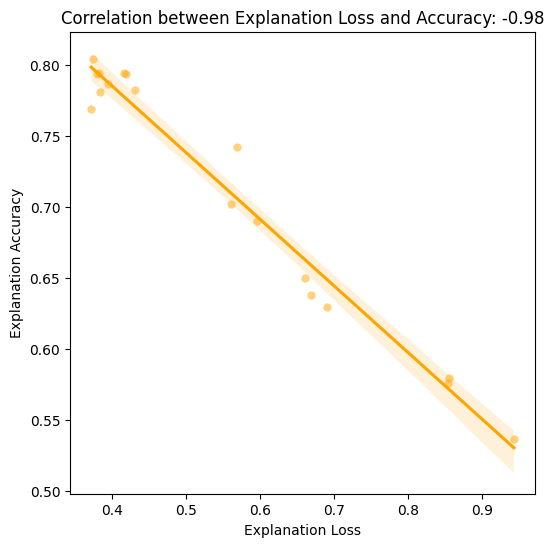

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

# ~ plotting correlation between the explanation loss and the explanation accuracy
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

loss_exp_values = []
acc_exp_values = []

for experiment in experiments_all:
    loss_exp = np.mean(experiment.data['loss_expl'][-10:])
    acc_exp = np.mean(experiment.data['approx'][-10:])
    
    loss_exp_values.append(loss_exp)
    acc_exp_values.append(acc_exp)
    
    ax.scatter(loss_exp, acc_exp, color='orange', linewidths=0.0, alpha=0.5)

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(loss_exp_values, acc_exp_values)[0, 1]

# Plot a linear fit through the scattered datapoints
sns.regplot(x=loss_exp_values, y=acc_exp_values, ax=ax, scatter=False, color='orange')

# Add title and labels
ax.set_title(f'Correlation between Explanation Loss and Accuracy: {correlation_coefficient:.2f}')
ax.set_xlabel('Explanation Loss')
ax.set_ylabel('Explanation Accuracy')

plt.show()
fig